In [1]:
import sys
import pandas as pd
import matplotlib as plt
import seaborn as sns
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates
from PIL import Image as im

from config import *
from SE_Interface import *

In [2]:
se_interface = SE_Interface()

summer = datetime(year=2021, month=8, day=15, hour=23)
now = datetime.now()
data = se_interface.request_SitePowerDetailed(now, timedelta(days=1))
#data = se_interface.request_SitePowerDetailed(summer, timedelta(days=1))

Requesting: https://monitoringapi.solaredge.com/site/2130766/powerDetails?meters=Consumption,Production&startTime=2021-12-14 19:54:16&endTime=2021-12-15 19:54:16&api_key=NTT5LNJGA5CDCFI9OZGZCX2W1VD3CCW2


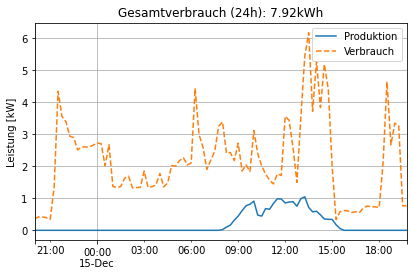

In [31]:
#summer = datetime(year=2021, month=8, day=15, hour=23, minute=15)
#data = se_interface.request_SitePowerDetailed(summer, timedelta(days=1))

df = data.copy()
df = df / 1000 # set to KWh
df = df.iloc[1: , :]    # Drop first row

# Plot lines
scaling = 120
width = EPD_WIDTH / scaling
height = EPD_HEIGHT / scaling
df.plot(style=["-", "--"], figsize=(width, height))

# Add total consumption
total = (df["Consumption"].sum() - df["Production"].sum()) / (24)
plt.title(f"Gesamtverbrauch (24h): {total:.2f}kWh")

# Formatting
plt.grid()
plt.xlabel("")
plt.ylabel("Leistung [kW]")
plt.legend(labels=["Produktion", "Verbrauch"])

# Output
plt.savefig("../out/plot.png", dpi=500)
plt.show()

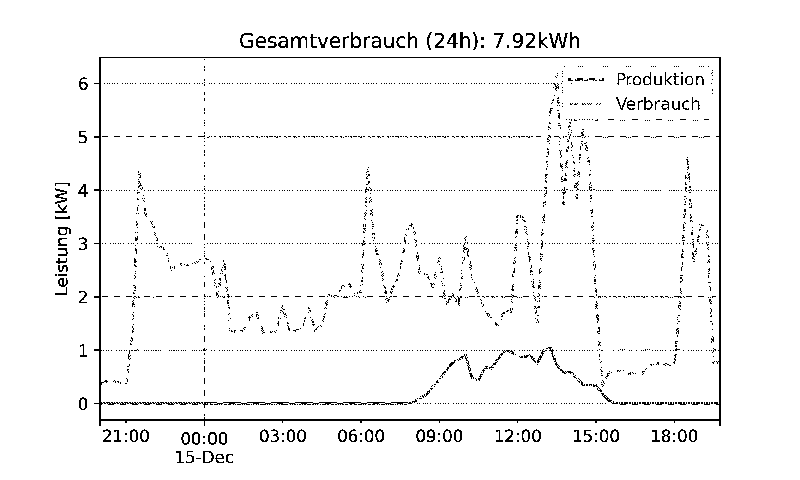

In [40]:
# png to bmp
from PIL import Image

file_in = "../out/plot.png"
img = Image.open(file_in).convert("1")
img = img.resize((800,480), Image.HAMMING)
file_out = "../out/plot.bmp"
img.save(file_out)
img
